# Assignment 5

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.



### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

%matplotlib inline
sns.set(style="ticks", color_codes=True)

from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection



### Read Data

In [2]:
vehicle = pd.read_csv('vehicle.csv')

### Perform basic EDA

In [3]:
# Shape of Data
vehicle.shape

(846, 19)

In [4]:
# Info
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
vehicle.head(15)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        154   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0             176.0              379.0                      184.0   
1             170.0              330.0                      158.0   
2             223.0              635.0                      220.0   
3             160.0              309.0                      127.0   
4             241.0              325.0                      188.0   
5             280.0              957.0                      264.0   
6             176.0              361.0                      172.0   
7             162.0              281.0                      164.0   
8             141.0              223.0              

In [6]:
# Summary of Numeric Attributes
vehicle.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [22]:
vehicle.groupby('class').describe().transpose().unstack(1)

class                          bus                                        \
                             count        mean         std    min    25%   
compactness                  218.0   91.591743    8.618024   78.0   85.0   
circularity                  214.0   44.981308    4.937128   35.0   42.0   
distance_circularity         215.0   76.767442   12.069575   59.0   69.0   
radius_ratio                 216.0  165.708333   30.543954  113.0  139.0   
pr.axis_aspect_ratio         217.0   63.414747    8.819873   47.0   56.0   
max.length_aspect_ratio      218.0    7.013761    4.757220    4.0    6.0   
scatter_ratio                218.0  170.022936   33.356812  141.0  149.0   
elongatedness                218.0   40.114679    6.501376   26.0   36.0   
pr.axis_rectangularity       217.0   20.580645    2.732553   18.0   19.0   
max.length_rectangularity    218.0  146.701835   10.492398  124.0  142.0   
scaled_variance              218.0  192.889908   33.996568  163.0  170.0   
scaled_variance.1            218.0  448.894495  193.138314  299.0  327.0   
scaled_radius_of_gyration    216.0  181.032407   31.380395  117.0  163.0   
scaled_radius_of_gyration.1  217.0   77.096774    7.692278   65.0   71.0   
skewness_about               214.0    4.794393    3.217436    0.0    2.0   
skewness_about.1             218.0   10.211009    6.872872    0.0    5.0   
skewness_about.2             218.0  187.811927    7.321230  178.0  181.0   
hollows_ratio                218.0  191.325688    7.918326  181.0  184.0   

class                                                 car              ...  \
                               50%     75%     max  count        mean  ...   
compactness                   89.0   98.00   114.0  429.0   96.184149  ...   
circularity                   44.0   47.00    58.0  428.0   46.035047  ...   
distance_circularity          72.0   80.50   109.0  429.0   88.878788  ...   
radius_ratio                 167.5  188.00   252.0  426.0  180.591549  ...   
pr.axis_aspect_ratio          64.0   69.00   126.0  428.0   60.992991  ...   
max.length_aspect_ratio        6.0    7.00    52.0  429.0    8.825175  ...   
scatter_ratio                152.0  177.75   265.0  428.0  181.053738  ...   
elongatedness                 44.0   45.00    47.0  428.0   38.093458  ...   
pr.axis_rectangularity        19.0   21.00    29.0  428.0   21.511682  ...   
max.length_rectangularity    145.0  149.75   175.0  429.0  149.967366  ...   
scaled_variance              177.0  203.75   288.0  427.0  197.894614  ...   
scaled_variance.1            344.0  486.50  1018.0  427.0  500.543326  ...   
scaled_radius_of_gyration    176.0  191.00   268.0  429.0  179.613054  ...   
scaled_radius_of_gyration.1   76.0   82.00   127.0  426.0   69.924883  ...   
skewness_about                 5.0    7.00    17.0  427.0    7.126464  ...   
skewness_about.1              10.0   14.00    31.0  428.0   15.170561  ...   
skewness_about.2             186.0  195.00   202.0  428.0  189.474299  ...   
hollows_ratio                189.0  198.75   209.0  429.0  197.582751  ...   

class                                         van                         \
                                75%    max  count        mean        std   
compactness                  103.00  119.0  199.0   90.562814   3.872308   
circularity                   53.00   59.0  199.0   42.070352   4.083111   
distance_circularity         103.00  112.0  198.0   73.247475  10.831162   
radius_ratio                 204.00  234.0  198.0  147.176768  29.959771   
pr.axis_aspect_ratio          64.00   74.0  199.0   61.261307  11.380564   
max.length_aspect_ratio       11.00   13.0  199.0    9.713568   7.224633   
scatter_ratio                212.00  227.0  199.0  141.537688  13.995574   
elongatedness                 44.00   61.0  199.0   47.939698   4.668439   
pr.axis_rectangularity        24.00   25.0  198.0   18.575758   1.033361   
max.length_rectangularity    165.00  188.0  199.0  145.175879  11.015335   
scaled

In [7]:
# Check missing values
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
cleanVehicle = vehicle.dropna()

In [9]:
cleanVehicle.info()
cleanVehicle.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

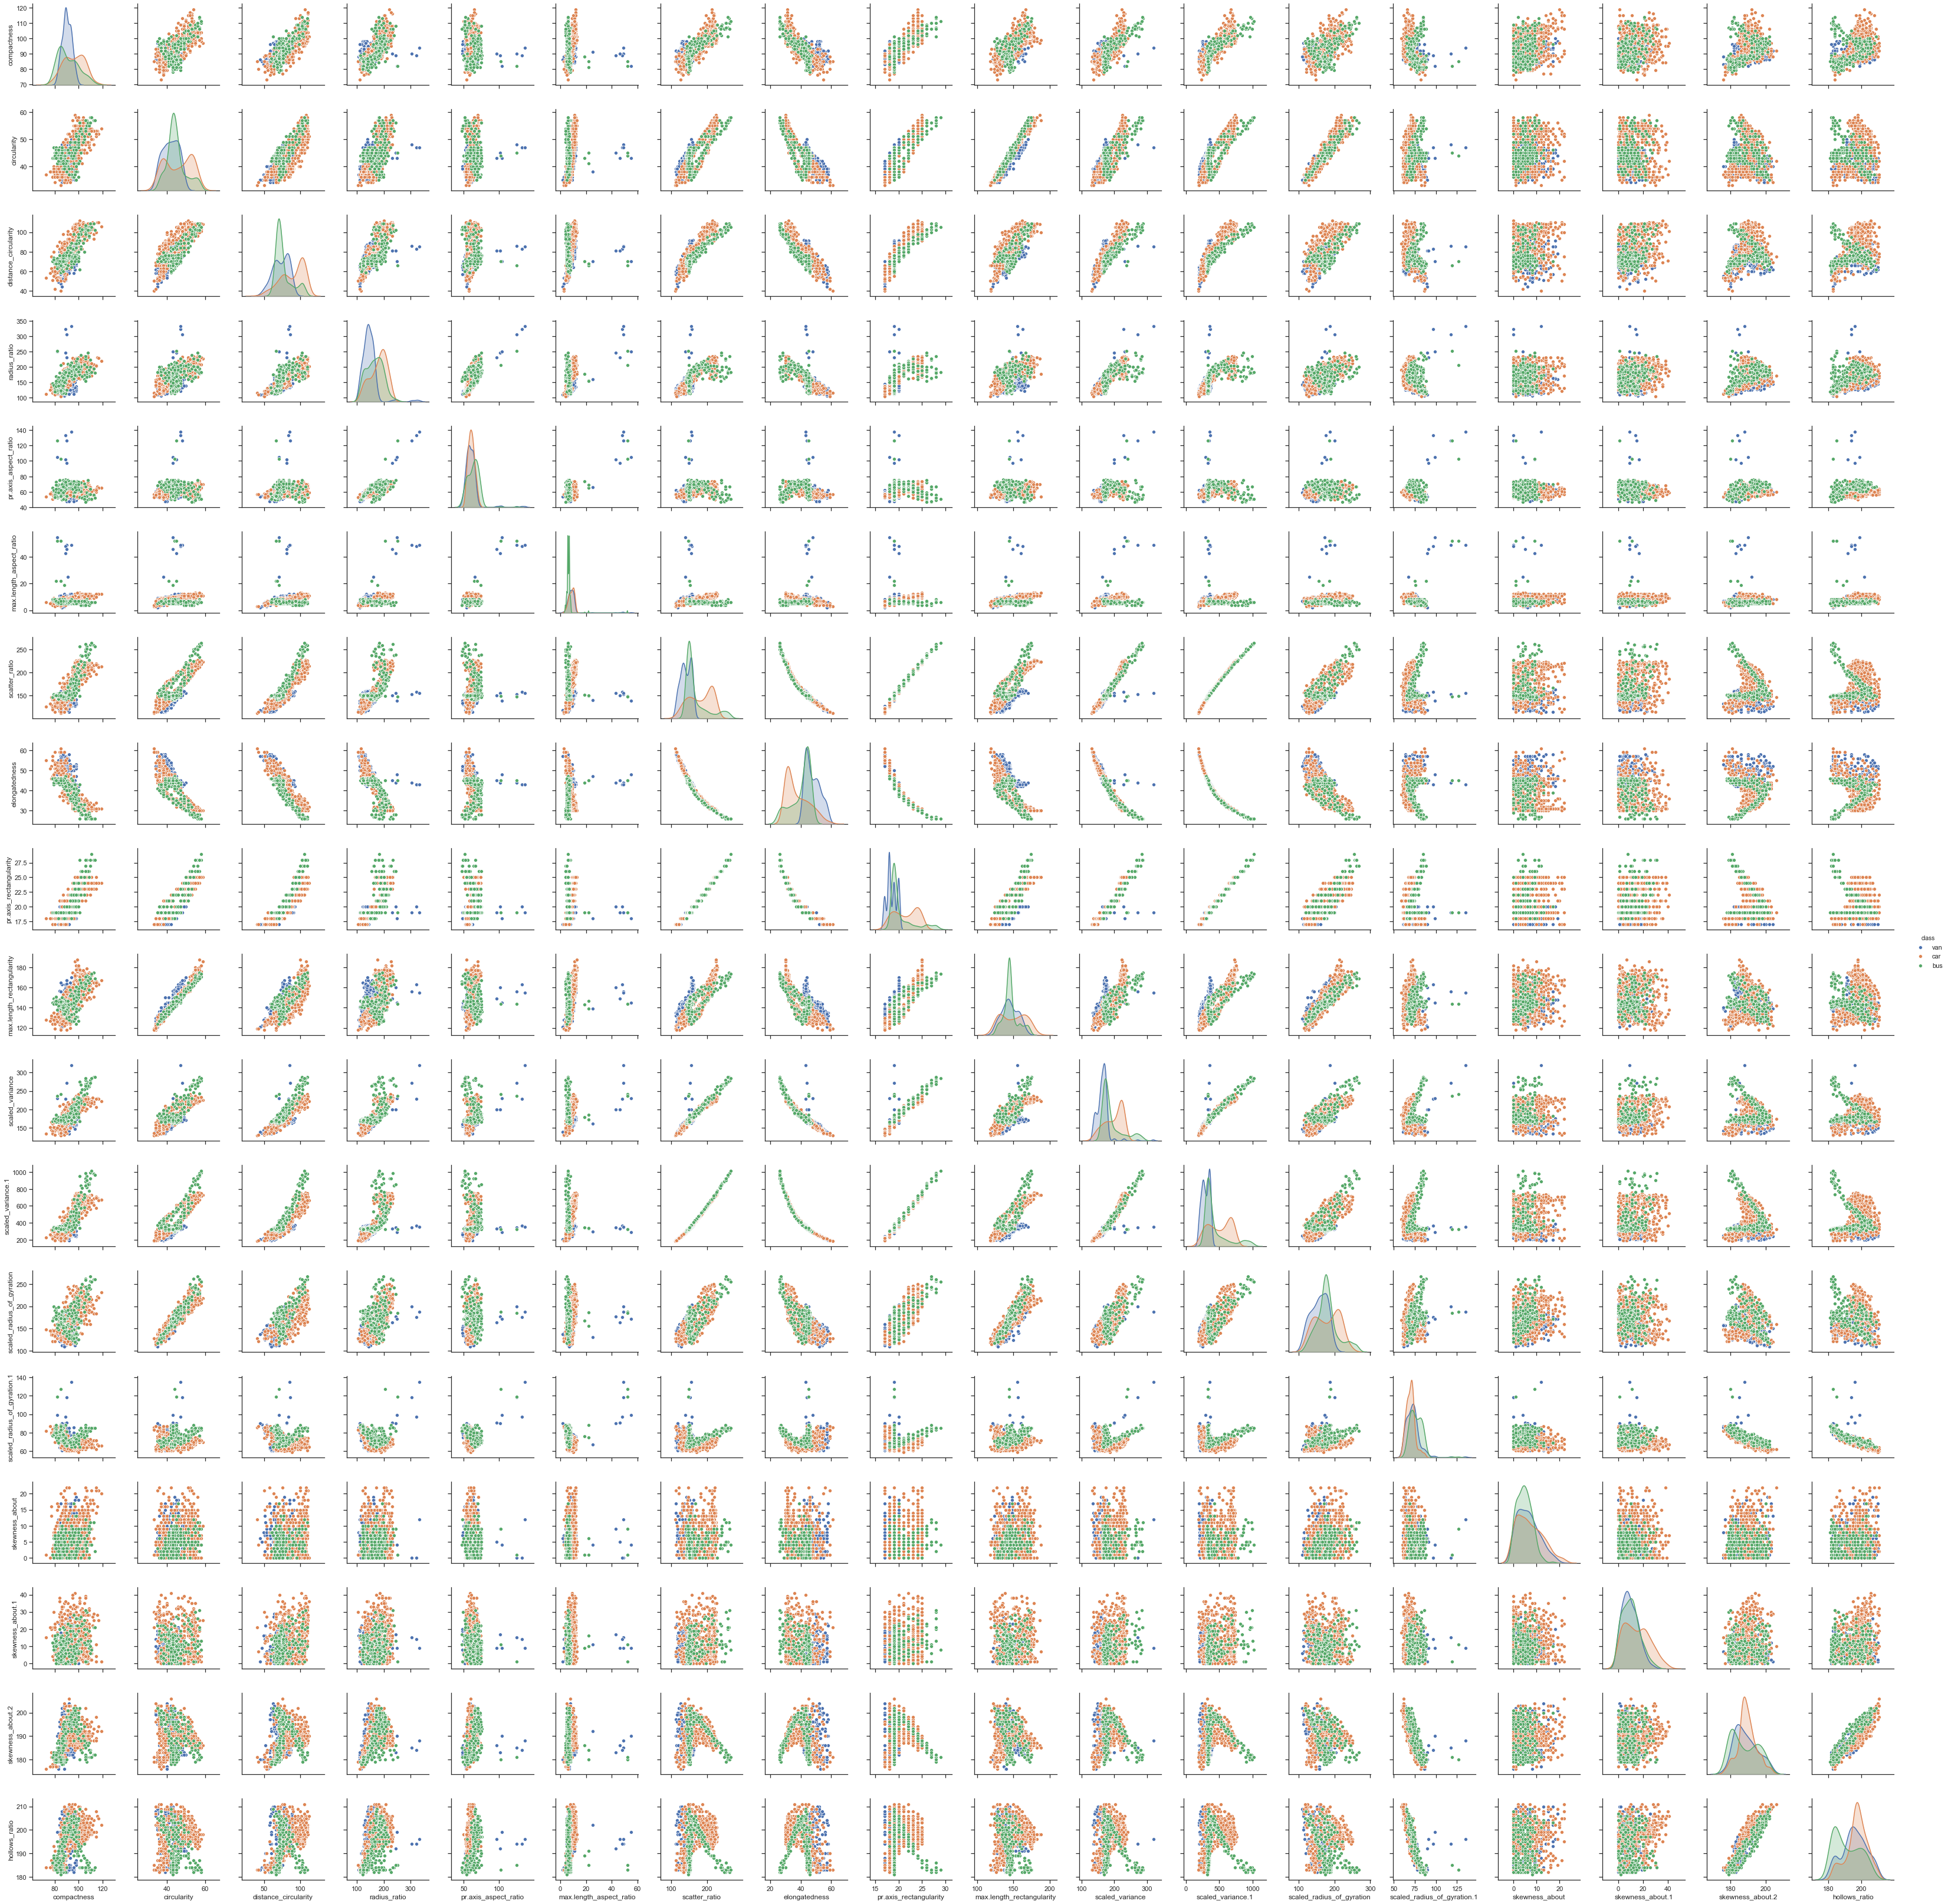

In [10]:
sns.pairplot(cleanVehicle, hue='class')

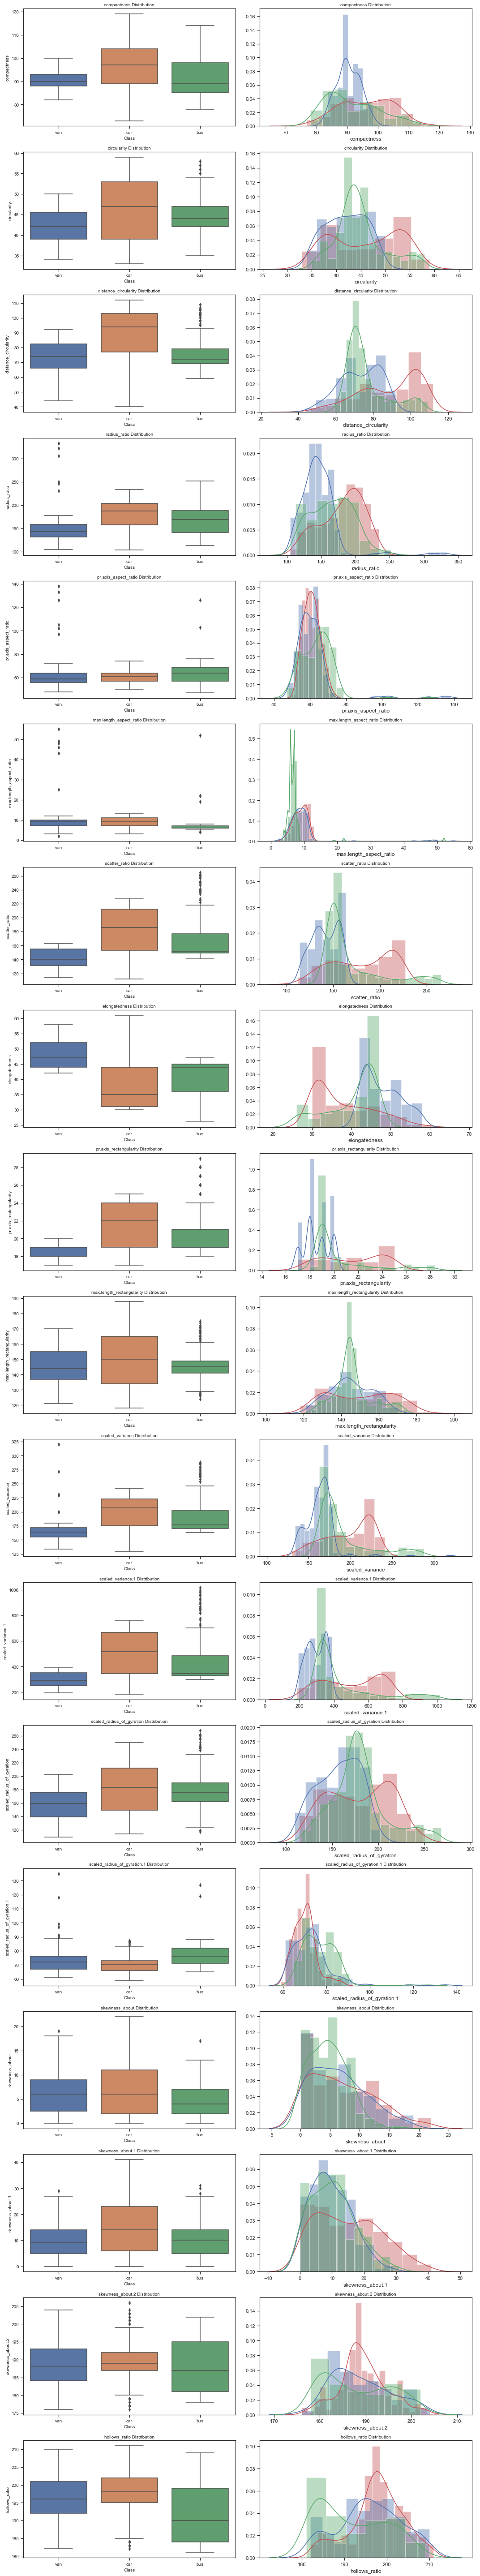

In [16]:
# Visualize individual Independent variables

fig, ax_arr = plt.subplots(nrows = 18, ncols = 2, figsize = (15,80))
ind_vars = cleanVehicle.columns

plt_row=0
for col in ind_vars:
    if (col != 'class'):
        # plot boxplot with class as hue
        sns.boxplot(y = cleanVehicle[col], x=cleanVehicle['class'], data = cleanVehicle, orient = 'v', ax = ax_arr[plt_row, 0])
        #ax_arr[plt_row,0].set_title(col + ' Distribution', fontsize=15)
        ax_arr[plt_row,0].set_xlabel('Class', fontsize=10)
        ax_arr[plt_row,0].set_ylabel(col, fontsize=10)
        ax_arr[plt_row,0].set_title(col + ' Distribution', fontsize=10)
        ax_arr[plt_row,0].tick_params(labelsize=10)


        
        sns.distplot( cleanVehicle[cleanVehicle['class'] == 'car'][col], color = 'r', ax = ax_arr[plt_row,1])
        sns.distplot( cleanVehicle[cleanVehicle['class'] == 'van'][col], color = 'b', ax = ax_arr[plt_row,1])
        sns.distplot( cleanVehicle[cleanVehicle['class'] == 'bus'][col], color = 'g', ax = ax_arr[plt_row,1])
        ax_arr[plt_row,1].set_title(col + ' Distribution', fontsize=10)
        
        plt_row+=1

            
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

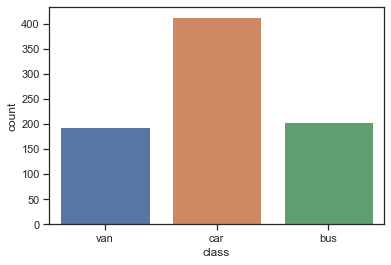

In [14]:
# Distribution of class
ax = sns.countplot(x="class", data=cleanVehicle)

#### Observation
1. Compactness of Van is between that of cars and bus. It is almost normally distributed around the mean for vans.
2. Circularity for Bus lies between van and car. Car shows two distinct peaks on either side.
3. Distance_Circularity is left-skewed for bus and right skewed for cars. 
4. Radius Ratio is left skewed for vans. For buses, it lies between the other two classes.
5. Max_length_aspect_ratio for buses is highly skewed to the left and has much smaller IQR than the other two classes.
6. Elongatedness is right skewed for buses and left skewed for cars. For vans data is mostly concentrated on the higher side. 

#### Correlation

In [33]:
from sklearn import preprocessing

# Convert target class to numeric

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
cleanVehicle['target'] = label_encoder.fit_transform(cleanVehicle['class']) 



/Users/abhaygoel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


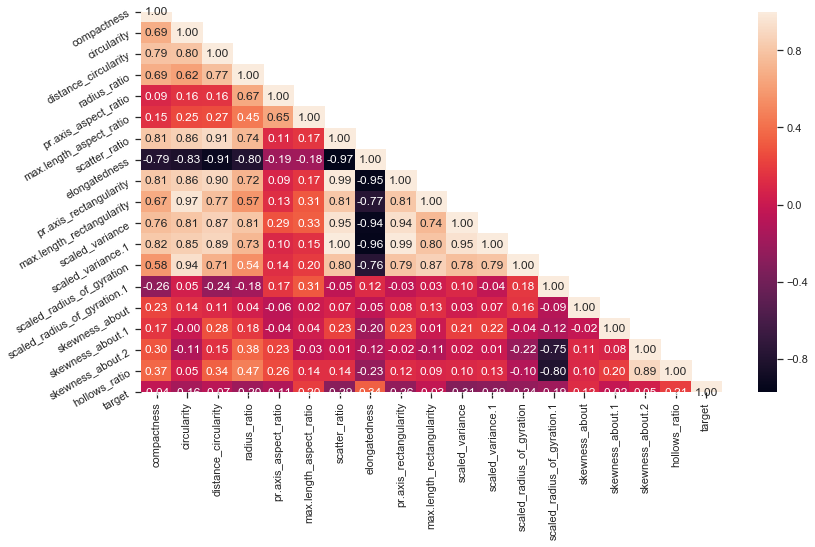

In [34]:
# Correlation with heat map
corr = cleanVehicle.corr()
#print("Correlation with Target: \n", corr['class'].sort_values(ascending=False))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

##### Observation
- There seems to be a very high degree of correlation between various features, eg. Circularity and distance_circularity shows high positive correlation with compactness while elongatedness has high negative correlation to compactness and distance_circularity.

#### Applying Models

#### Transform Categorical Variables into Dummy Variables
- Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transformed into dummy variables.

- Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories.

In [24]:
cleanVehicle['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [25]:
#Identify outliers and replace them by median

# for col_name in cleanVehicle.columns[:-1]:
#     q1 = cleanVehicle[col_name].quantile(0.25)
#     q3 = cleanVehicle[col_name].quantile(0.75)
#     iqr = q3 - q1
    
#     low = q1-1.5*iqr
#     high = q3+1.5*iqr
#     print("column:", col_name, "low:",low, " high:", high)
#     #cleanVehicle.loc[(cleanVehicle[col_name] < low) | (cleanVehicle[col_name] > high), col_name] = cleanVehicle[col_name].median()

#### Split data into train and test

In [41]:
from sklearn import preprocessing

# Convert target class to numeric

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Y = cleanVehicle['target']



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


X = cleanVehicle.drop(['class', 'target'], axis=1)

# 30% of the data will be used for testing
test_size= 0.30
seed = 100

# Doing stratified split to maintain target class balance
sk_fold = StratifiedKFold(n_splits=10, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, stratify=Y)

In [43]:
print(x_train.columns)

# Ensure target class maintains balance as the original
print("Original Y: \n", Y.value_counts(normalize=True))
print("y_train: \n", y_train.value_counts(normalize=True))

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')
Original Y: 
 1    0.507995
0    0.252153
2    0.239852
Name: target, dtype: float64
y_train: 
 1    0.507909
0    0.251318
2    0.240773
Name: target, dtype: float64


In [45]:
# stratify=Y ensures data is split in the same ratio as original target class data.

In [46]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_x_train = sc_X.fit_transform(x_train)
sc_x_test = sc_X.transform(x_test)

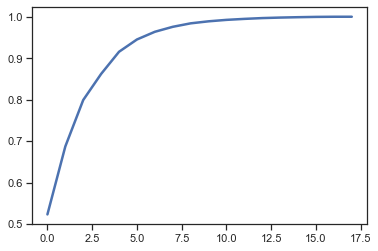

In [47]:
## There are several variables that are highly correlated with each other
#Run PCA and plot to visualise the ideal number of components
from sklearn.decomposition import PCA

pca = PCA().fit(sc_x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52334303, 0.68723097, 0.79922623, 0.86213791, 0.915541  ,
       0.9451626 , 0.96371387, 0.97571837, 0.98408626, 0.98897372,
       0.99245586, 0.99483828, 0.99677719, 0.99799842, 0.99890738,
       0.9996366 , 0.99998012, 1.        ])

In [49]:
#Based on the plot, we will select 10 components that explain almost 99% of the variance
pca = PCA(n_components=10)
pca.fit(sc_x_train)

#Assign the components to the X variable
pca_x_train = pca.transform(sc_x_train)

In [50]:
pca_x_test = pca.transform(sc_x_test)

In [67]:
from sklearn import model_selection
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(pca_x_train, y_train)
knnpred = knn.predict(pca_x_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, pca_x_train, y_train, cv=sk_fold, n_jobs=4, scoring = 'accuracy').mean())

print(metrics.classification_report(y_test, knnpred))

[[ 60   2   0]
 [  5 115   4]
 [  4  11  43]]
89.0
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        62
           1       0.90      0.93      0.91       124
           2       0.91      0.74      0.82        58

    accuracy                           0.89       244
   macro avg       0.89      0.88      0.88       244
weighted avg       0.90      0.89      0.89       244



In [68]:
from sklearn.svm import SVC

#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV

model = SVC()

params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']}

model1 = GridSearchCV(model, param_grid=params, verbose=5, n_jobs=4)

model1.fit(pca_x_train, y_train)

print("Best Hyper Parameters:\n", model1.best_params_)

print()


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of  40 | elapsed:    0.1s remaining:    0.6s


Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished


In [69]:
#Build the model with the best hyper parameters

model = SVC(C=1, kernel="rbf", probability=True)

scores = model_selection.cross_val_score(model, pca_x_train, y_train, cv=sk_fold, scoring='accuracy')


print("scores:", scores)
print("mean score:", scores.mean())

scores: [0.96491228 0.94736842 0.96491228 0.85964912 0.96491228 0.94736842
 0.94736842 0.98245614 0.96491228 0.92857143]
mean score: 0.9472431077694236


In [70]:
SVCCV = scores.mean()

In [71]:
model.fit(pca_x_train, y_train)
svcpred = model.predict(pca_x_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)

print(metrics.classification_report(y_test, svcpred))

[[ 59   2   1]
 [  0 117   7]
 [  0   0  58]]
96.0
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.98      0.94      0.96       124
           2       0.88      1.00      0.94        58

    accuracy                           0.96       244
   macro avg       0.95      0.97      0.96       244
weighted avg       0.96      0.96      0.96       244



In [72]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(pca_x_train, y_train)
gaussiannbpred = gaussiannb.predict(pca_x_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, pca_x_train, y_train, cv=sk_fold, n_jobs=4, scoring = 'accuracy').mean())

print(metrics.classification_report(y_test, gaussiannbpred))

[[ 45  13   4]
 [  4 119   1]
 [  2  22  34]]
81.0
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        62
           1       0.77      0.96      0.86       124
           2       0.87      0.59      0.70        58

    accuracy                           0.81       244
   macro avg       0.84      0.76      0.78       244
weighted avg       0.82      0.81      0.80       244



In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(pca_x_train, y_train)
dtreepred = dtree.predict(pca_x_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, pca_x_train, y_train, cv=sk_fold, n_jobs=4, scoring = 'accuracy').mean())

print(metrics.classification_report(y_test, dtreepred))

[[ 53   5   4]
 [  6 106  12]
 [  4  10  44]]
83.0
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        62
           1       0.88      0.85      0.87       124
           2       0.73      0.76      0.75        58

    accuracy                           0.83       244
   macro avg       0.82      0.82      0.82       244
weighted avg       0.83      0.83      0.83       244



In [74]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=10, criterion='gini')#criterion = entopy,gini

rfc.fit(pca_x_train, y_train)
rfcpred = rfc.predict(pca_x_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, pca_x_train, y_train, cv=sk_fold, n_jobs=1, scoring = 'accuracy').mean())
print(metrics.classification_report(y_test, rfcpred))

[[ 55   5   2]
 [  1 113  10]
 [  2   4  52]]
90.0
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        62
           1       0.93      0.91      0.92       124
           2       0.81      0.90      0.85        58

    accuracy                           0.90       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.90      0.90       244



In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=10,min_child_weight=1,gamma=0,subsample=0.8,
 colsample_bytree=0.8, scale_pos_weight=1)
xgb.fit(pca_x_train, y_train)
xgbpred = xgb.predict(pca_x_test)

print(confusion_matrix(y_test, xgbpred ))
print(round(accuracy_score(y_test, xgbpred),2)*100)
XGB = (cross_val_score(estimator = xgb, X = pca_x_train, y = y_train, cv = 10).mean())

[[ 54   6   2]
 [  0 117   7]
 [  1   4  53]]
92.0


In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bgc = BaggingClassifier(tree.DecisionTreeClassifier(random_state=seed), n_estimators=20)
bgc.fit(pca_x_train, y_train)
bgcpred = bgc.predict(pca_x_test)
bgc.score(pca_x_test,y_test)
print(confusion_matrix(y_test, bgcpred ))
print(round(accuracy_score(y_test, bgcpred),2)*100)
BGC = (cross_val_score(estimator = bgc, X = pca_x_train, y = y_train, cv = 10).mean())


[[ 56   5   1]
 [  1 114   9]
 [  2   1  55]]
92.0


In [77]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(random_state=seed, n_estimators=5)
adab.fit(pca_x_train, y_train)
adabpred = adab.predict(pca_x_test)
adab.score(pca_x_test,y_test)
print(confusion_matrix(y_test, adabpred ))
print(round(accuracy_score(y_test, adabpred),2)*100)
ADAB = (cross_val_score(estimator = adab, X = pca_x_train, y = y_train, cv = 10).mean())

[[42 20  0]
 [24 83 17]
 [12  2 44]]
69.0


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=10, max_depth=5, random_state=seed)
gbc.fit(pca_x_train, y_train)
gbcpred = gbc.predict(pca_x_test)
print(confusion_matrix(y_test, gbcpred ))
print(round(accuracy_score(y_test, gbcpred),2)*100)
GBC = (cross_val_score(estimator = gbc, X = pca_x_train, y = y_train, cv = 10).mean())

[[ 50   9   3]
 [  1 114   9]
 [  1   7  50]]
88.0


### Comparing various Models

In [79]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors',  'Gausian NB', 'XGBoost', 'Gradient Boosting', 'Adaptive Boosting', 'Bagging Classifier'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV,  GAUSIAN, XGB, GBC, ADAB, BGC]})

models.sort_values(by='Score', ascending=False)

Models     Score
2    Support Vector Machine  0.947243
5                   XGBoost  0.912218
8        Bagging Classifier  0.887657
0  Random Forest Classifier  0.878759
6         Gradient Boosting  0.873622
3          K-Near Neighbors  0.866416
1  Decision Tree Classifier  0.819110
4                Gausian NB  0.818860
7         Adaptive Boosting  0.701159

#### Conclusion

Support Vector Classifier seems to perform the best with an accuracy of almost 95%, followed by XGBoost.